<h1> Implementing class and loading the data that can be used for all the subsequent models of Perceptron

In [1]:
import pandas as pd
from sklearn import *
import matplotlib.pyplot as plt
import numpy as np
#Loading the Data from UCI Machine Learning Respository as given in the textbook page 29
data = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data',header = None)
data.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
#Showing entire data that is loaded with the number of rows and columns.
data 

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Building a class of Perceptron that takes learning rate eta, iterations and random state as an input. 
import numpy as np
from sklearn.linear_model import Perceptron
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta #eta is the learning rate
        self.n_iter = n_iter #n_iter is the iterations
        self.random_state = random_state #random_state are used to genrate weights.
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state) 
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
        size=1 + X.shape[1])
        self.errors_ = [] 
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi)) #updating the weights.
                self.w_[1:] += update * xi 
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [4]:
#Function plot_decision_regions used to plot the graph. 
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('x', 'o')
    colors = ('green', 'purple')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.07, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plotting class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=cl,
        edgecolor='black')

<h1> Two Features Linearly Sepearable (Sepal Length and Petal Length for Setosa and Versicolor)</h1> 

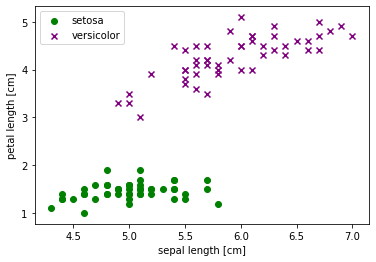

In [5]:
# Plotting to show that features are linearly seperable.(Reference Page number 30 from the textbook)
# using df.iloc to select 100 values and storing labels in y. 
y_2feature = data.iloc[0:100, 4].values
y_2feature = np.where(y_2feature == 'Iris-setosa', -1, 1)
# extract features (sepal length and petal length) and stroring it in X.
X_2feature = data.iloc[0:100, [0, 2]].values
# plot data
plt.scatter(X_2feature[:50, 0], X_2feature[:50, 1], color='green', marker='o', label='setosa')
plt.scatter(X_2feature[50:100, 0], X_2feature[50:100, 1], color='purple', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
# splitting the data
x_train_2feature, x_test_2feature, y_train_2feature, y_test_2feature = train_test_split(X_2feature, y_2feature,test_size=0.2,random_state=0)

In [11]:
#calling the Perceptron class defined earlier and loading it into classifier_model. 
classifier_model = Perceptron(eta= 0.001, n_iter = 30)

In [12]:
#Fitting the model
classifier_model.fit(x_train_2feature, y_train_2feature)

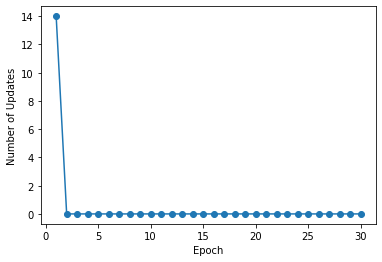

In [13]:
#Plotting the graph Epoch v/s Number of Updates
plt.plot(range(1, len(classifier_model.errors_) + 1),
         classifier_model.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Updates')
plt.show()

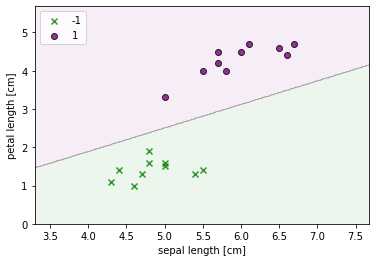

Accuracy: 1.000000


In [14]:
#Calling the plot_decision_regions defined earlier and passing the test data.  
plot_decision_regions(x_test_2feature, y_test_2feature, classifier_model)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()
from sklearn.metrics import accuracy_score
#Printing the accuracy
print("Accuracy: %f" % accuracy_score(classifier_model.predict(X_2feature), y_2feature))

<b> <h1> Perceptron Two Feature Non-Linearly Seperable(Versicolor vs Virginica)  </h1></b>

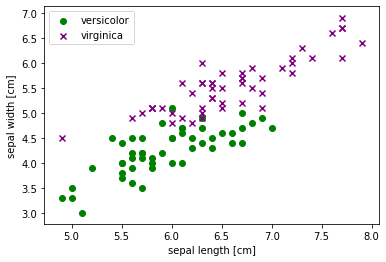

In [15]:
# Plotting to show that features are linearly seperable.(Reference Page number 30 from the textbook)
# using df.iloc to select 100 values and storing labels in y. 
y_2feature_nl = data.iloc[0:100, 4].values
y_2feature_nl = np.where(y_2feature_nl == 'Iris-setosa', -1, 1)
# extract features (sepal length and petal length) and stroring it in X.
X_2feature_nl = data.iloc[50:150, [0, 2]].values
# plot data
plt.scatter(X_2feature_nl[:50, 0], X_2feature_nl[:50, 1], color='green', marker='o', label='versicolor')
plt.scatter(X_2feature_nl[50:150, 0], X_2feature_nl[50:150, 1], color='purple', marker='x', label='virginica')
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [16]:
#Splitting the data
x_train_2feature_nl, x_test_2feature_nl, y_train_2feature_nl, y_test_2feature_nl = train_test_split(X_2feature_nl, y_2feature_nl, test_size=0.2, random_state=0)

In [33]:
#Calling the perceptron class defined earlier
classifier_model_2nl = Perceptron(eta = 0.0002, n_iter=50)

In [34]:
#Fitting the model with training data
classifier_model_2nl.fit(x_train_2feature_nl, y_train_2feature_nl)

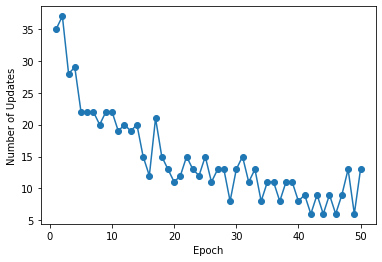

In [35]:
# plot the number of errors during each iteration
plt.plot(range(1, len(classifier_model_2nl.errors_) + 1),
         classifier_model_2nl.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Updates')
plt.show()

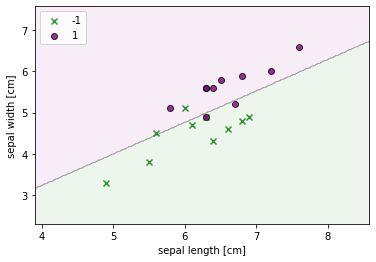

Accuracy: 0.800000


In [36]:
#Calling the plot_decision_regions defined earlier and passing the test data.
plot_decision_regions(x_test_2feature_nl, y_test_2feature_nl, classifier_model_2nl)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')
plt.show()
#Printing the data
from sklearn.metrics import accuracy_score
print("Accuracy: %f" % accuracy_score(classifier_model_2nl.predict(x_test_2feature_nl), y_test_2feature_nl))

<h1> Perceptron 3 Feature Linearly Seperable </h1>

In [37]:
# Plotting to show that features are linearly seperable.(Reference Page number 30 from the textbook)
# using df.iloc to select 100 values and storing labels in y. 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
y_3feature = data.iloc[0:100, 4].values
y_3feature = np.where(y_3feature == 'Iris-setosa', -1, 1)
# extract features (sepal length and petal length) and stroring it in X.
X_3feature = data.iloc[0:100, 0:3].values

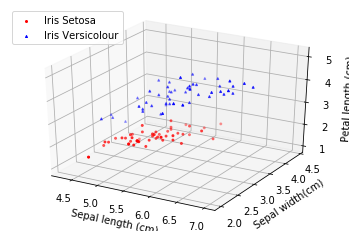

In [38]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel("Sepal length (cm)")
ax.set_ylabel("Sepal width(cm)")
ax.set_zlabel("Petal length (cm)")
# plot the samples

ax.scatter(X_3feature[:50, 0], X_3feature[:50, 1], X_3feature[:50, 2], color='red', 
           marker='o', s=4, edgecolor='red', label="Iris Setosa")
ax.scatter(X_3feature[50:100, 0], X_3feature[50:100, 1], X_3feature[50:100, 2], color='blue', 
           marker='^', s=4, edgecolor='blue', label="Iris Versicolour")
plt.legend(loc='upper left')
plt.show()

In [39]:
# splitting the data
x_train_3feature, x_test_3feature, y_train_3feature, y_test_3feature = train_test_split(X_3feature, y_3feature,test_size=0.2,random_state=0)

In [41]:
#Calling the perceptron class defined earlier
classifier_model_3feature = Perceptron(eta = 0.001,n_iter = 30)

In [42]:
#Fitting the model
classifier_model_3feature.fit(x_train_3feature, y_train_3feature)

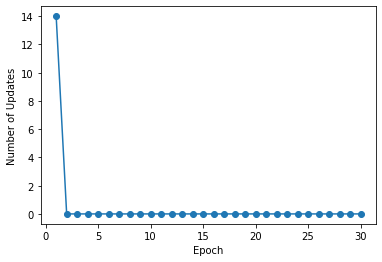

Accuracy: 1.000000


In [43]:
#Plotting the graph for epoch vs Number of Updates
plt.plot(range(1, len(classifier_model.errors_) + 1),
         classifier_model.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Updates')
plt.show()
from sklearn.metrics import accuracy_score
#Printing the accuracy
print("Accuracy: %f" % accuracy_score(classifier_model_3feature.predict(X_3feature), y_3feature))

<h1> Perceptron 3 Feature Non Linearly Seperable </h1>

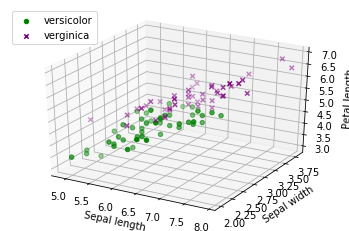

In [44]:
y_3feature_nl = data.iloc[50:150, 4].values
# extract features
y_3feature_nl = np.where(y_3feature_nl == 'Iris-versicolor', -1, 1)
X_3feature_nl = data.iloc[50:150, 0:3].values
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_zlabel("Petal length")
# plot the samples
ax.scatter(X_3feature_nl[:50, 0], X_3feature_nl[:50, 1], X_3feature_nl[:50, 2], color='green', marker='o',label="versicolor")
ax.scatter(X_3feature_nl[50:100, 0], X_3feature_nl[50:100, 1], X_3feature_nl[50:100, 2], color='purple', marker='x', label="verginica")
plt.legend(loc='upper left')
plt.show()

In [45]:
#Splitting the data
x_train_3feature_nl, x_test_3feature_nl, y_train_3feature_nl, y_test_3feature_nl = train_test_split(X_3feature_nl, y_3feature_nl, test_size=0.2, random_state=0)

In [179]:
#Calling the perceptron class defined earlier
classifier_model_3nl = Perceptron(eta = 0.00037,n_iter = 30)

In [180]:
#Fitting the model
classifier_model_3nl.fit(x_train_3feature_nl, y_train_3feature_nl)

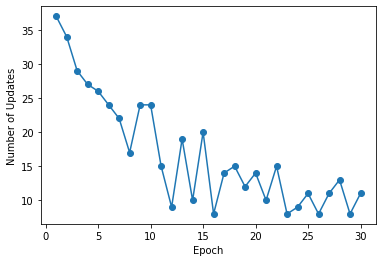

Accuracy: 0.850000


In [181]:
# plot the number of errors during each iteration
plt.plot(range(1, len(classifier_model_3nl.errors_) + 1),
         classifier_model_3nl.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Updates')
plt.show()
from sklearn.metrics import accuracy_score
#Printing the Accuracy
print("Accuracy: %f" % accuracy_score(classifier_model_3nl.predict(x_test_3feature_nl), y_test_3feature_nl))

<h1> Perceptron 4 Feature Linearly Separable </h1>

In [49]:
# Plotting to show that features are linearly seperable.(Reference Page number 30 from the textbook)
# using df.iloc to select 100 values and storing labels in y. 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
y_4feature = data.iloc[0:100, 4].values
y_4feature = np.where(y_4feature == 'Iris-setosa', -1, 1)
# extract features (sepal length and petal length) and stroring it in X.
X_4feature = data.iloc[0:100, 0:4].values

In [50]:
# split the data
x_train_4feature, x_test_4feature, y_train_4feature, y_test_4feature = train_test_split(X_4feature, y_4feature,test_size=0.2,random_state=0)

In [51]:
#Calling the perceptron class defined earlier
classifier_model_4feature = Perceptron(eta=0.001,n_iter = 30)

In [52]:
#Fitting using the training data
classifier_model_4feature.fit(x_train_4feature, y_train_4feature)

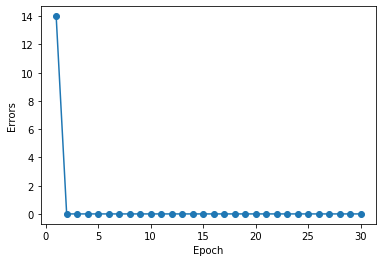

Accuracy: 1.000000


In [53]:
#Plotting the graph Epoch v/s Number of Updates
plt.plot(range(1, len(classifier_model.errors_) + 1),
         classifier_model.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Updates')
plt.show()
#Printing the accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: %f" % accuracy_score(classifier_model_4feature.predict(X_4feature), y_4feature))

<h1> Perceptron 4 Feature Non-Linearly Separable </h1>

In [54]:
y_4feature_nl = data.iloc[50:150, 4].values
# extract features
y_4feature_nl = np.where(y_4feature_nl == 'Iris-versicolor', -1, 1)
X_4feature_nl = data.iloc[50:150, 0:4].values

In [55]:
x_train_4feature_nl, x_test_4feature_nl, y_train_4feature_nl, y_test_4feature_nl = train_test_split(X_4feature_nl, y_4feature_nl, test_size=0.2, random_state=0)

In [170]:
#Calling the perceptron class defined earlier
classifier_model_4nl = Perceptron(eta = 0.0002,n_iter = 30)

In [171]:
classifier_model_4nl.fit(x_train_4feature_nl, y_train_4feature_nl)

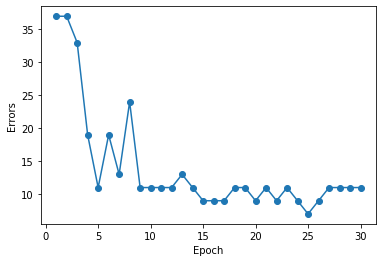

'Accuracy: 0.900000'

In [172]:
# plot the number of errors during each iteration
plt.plot(range(1, len(classifier_model_4nl.errors_) + 1),
         classifier_model_4nl.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.show()
from sklearn.metrics import accuracy_score
("Accuracy: %f" % accuracy_score(classifier_model_4nl.predict(x_test_4feature_nl), y_test_4feature_nl))

<b> Observations:
    With the increase in the number of features, the accuracy is also getting increased in linearly not sepearble. </b>

<h1> Adaline </h1>

<h3> Implementing Adaline Class from Textbook page 38

In [74]:
#Implementing the Adaline class. With learning rate, number of iterations and random and state as the parameters. 
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta #Learning rate
        self.n_iter = n_iter #Number of iterations
        self.random_state = random_state #Random state used to generate weights. 
    def fit(self, X, y): #Fitting function used for random weight generation and calculating the cost which will be used to transform the data.
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0 
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        return X
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

<h2> Adaline 2 Feature Linearly Seperable </h2>

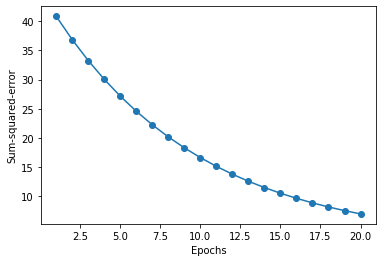

In [75]:
adaline_model_2feature = AdalineGD(eta=0.0006, n_iter=20, random_state=1).fit(x_train_2feature, y_train_2feature)
#plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
plt.plot(range(1, len(adaline_model_2feature.cost_) + 1), adaline_model_2feature.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

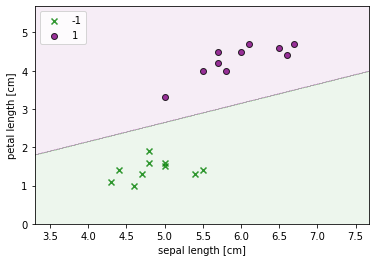

Accuracy: 1.000000


In [76]:
plot_decision_regions(x_test_2feature, y_test_2feature, adaline_model_2feature)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()
from sklearn.metrics import accuracy_score
print("Accuracy: %f" % accuracy_score(adaline_model_2feature.predict(x_test_2feature), y_test_2feature))

<h2> Adaline 2 Feature Non-Linearly Separable </h2>

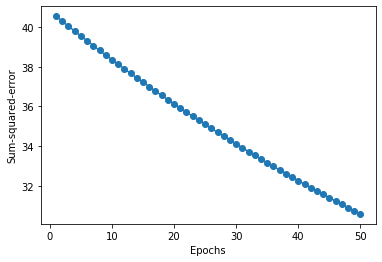

In [166]:
adaline_model_2feature_nl = AdalineGD(eta=0.000387, n_iter=50, random_state=1).fit(x_train_2feature_nl, y_train_2feature_nl)
plt.plot(range(1, len(adaline_model_2feature_nl.cost_) + 1),adaline_model_2feature_nl.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

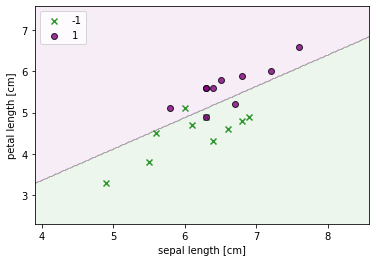

Accuracy: 0.850000


In [167]:
plot_decision_regions(x_test_2feature_nl, y_test_2feature_nl, adaline_model_2feature_nl)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()
print("Accuracy: %f" % accuracy_score(adaline_model_2feature_nl.predict(x_test_2feature_nl), y_test_2feature_nl))

<h2> Adaline 3 Feature Linearly Seperable 

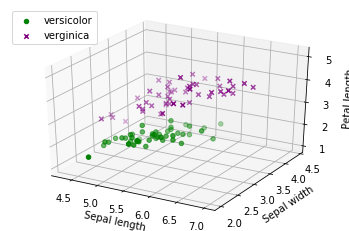

In [79]:
y_3feature = data.iloc[0:100, 4].values
# extract features
y_3feature = np.where(y_3feature == 'Iris-versicolor', -1, 1)
X_3feature = data.iloc[0:100, 0:3].values
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_zlabel("Petal length")
# plot the samples
ax.scatter(X_3feature[:50, 0], X_3feature[:50, 1], X_3feature[:50, 2], color='green', marker='o',label="versicolor")
ax.scatter(X_3feature[50:100, 0], X_3feature[50:100, 1], X_3feature[50:100, 2], color='purple', marker='x', label="verginica")
plt.legend(loc='upper left')
plt.show()

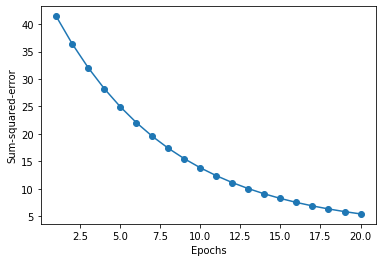

Accuracy: 1.000000


In [80]:
adaline_model_3feature = AdalineGD(eta=0.0005, n_iter=20, random_state=1).fit(x_train_3feature, y_train_3feature)
plt.plot(range(1, len(adaline_model_3feature.cost_) + 1), adaline_model_3feature.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()
print("Accuracy: %f" % accuracy_score(adaline_model_3feature.predict(x_test_3feature), y_test_3feature))

<h2> Adaline 3 Non-Linearly Separable </h2>

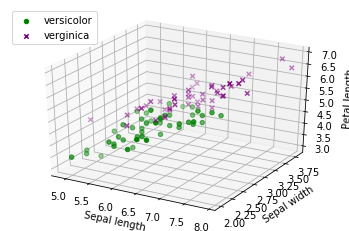

In [81]:
y_3feature_nl = data.iloc[50:150, 4].values
# extract features
y_3feature_nl = np.where(y_3feature_nl == 'Iris-versicolor', -1, 1)
X_3feature_nl = data.iloc[50:150, 0:3].values
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_zlabel("Petal length")
# plot the samples
ax.scatter(X_3feature_nl[:50, 0], X_3feature_nl[:50, 1], X_3feature_nl[:50, 2], color='green', marker='o',label="versicolor")
ax.scatter(X_3feature_nl[50:100, 0], X_3feature_nl[50:100, 1], X_3feature_nl[50:100, 2], color='purple', marker='x', label="verginica")
plt.legend(loc='upper left')
plt.show()

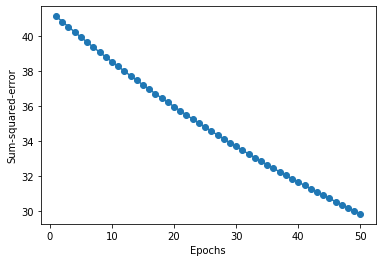

Accuracy: 0.900000


In [82]:
adaline_model_3feature = AdalineGD(eta=0.00034, n_iter=50).fit(x_train_3feature_nl, y_train_3feature_nl)
plt.plot(range(1, len(adaline_model_3feature.cost_) + 1), adaline_model_3feature.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()
print("Accuracy: %f" % accuracy_score(adaline_model_3feature.predict(x_test_3feature_nl), y_test_3feature_nl))

<h2> Adaline 4 Feature Linearly Separable </h2>

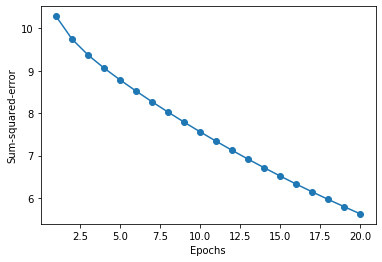

Accuracy: 1.000000


In [83]:
adaline_model_4feature = AdalineGD(eta=0.0004, n_iter=20, random_state=1).fit(x_test_4feature, y_test_4feature)
plt.plot(range(1, len(adaline_model_4feature.cost_) + 1),adaline_model_4feature.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()
print("Accuracy: %f" % accuracy_score(adaline_model_4feature.predict(x_test_4feature), y_test_4feature))

<h2> Adaline 4 Feature Non-Linearly Separable </h2>

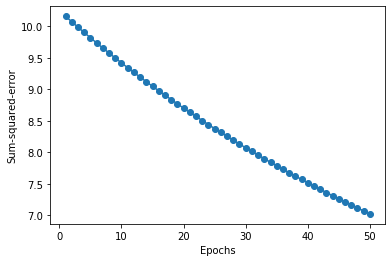

Accuracy: 0.950000


In [157]:
adaline_model_4feature_nl = AdalineGD(eta=0.00125, n_iter=50)
adaline_model_4feature_nl.fit(x_test_4feature_nl, y_test_4feature_nl)
plt.plot(range(1, len(adaline_model_4feature_nl.cost_) + 1),adaline_model_4feature_nl.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()
print("Accuracy: %f" % accuracy_score(adaline_model_4feature_nl.predict(x_test_4feature_nl), y_test_4feature_nl))

In [200]:
#Summary of results
import pandas as pd
print("Summary of the results")

results = {'Model': ['Pereptron','Adaline'],
           'Accuracy 2 feature Linearly Separable.': ['1.00','1.00'],
           'Accuracy 3 feature Linearly Separable': ['1.00','1.00'],'\n'
           'Accuracy 4 feature Linearly Separable': ['1.00','1.00'],
           'Accuracy 2 feature Non Linearly Separable': ['0.80','0.85'],
           'Accuracy 3 feature Non Linearly Separable': ['0.85','0.90'],
           'Accuracy 4 feature Non Linearly Separable': ['0.90','0.95'],
        }

df = pd.DataFrame(results)
print(df)

print("Observations:")
print("Adaline model is better than Perceptron model")
print("As we add more features the accuracy increases.")

Summary of the results
       Model Accuracy 2 feature Linearly Separable.  \
0  Pereptron                                   1.00   
1    Adaline                                   1.00   

  Accuracy 3 feature Linearly Separable  \
0                                  1.00   
1                                  1.00   

  \nAccuracy 4 feature Linearly Separable  \
0                                    1.00   
1                                    1.00   

  Accuracy 2 feature Non Linearly Separable  \
0                                      0.80   
1                                      0.85   

  Accuracy 3 feature Non Linearly Separable  \
0                                      0.85   
1                                      0.90   

  Accuracy 4 feature Non Linearly Separable  
0                                      0.90  
1                                      0.95  
Observations:
Adaline model is better than Perceptron model
As we add more features the accuracy increases.
